In [2]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
data_path = ("data/SMSSpamCollection")

In [4]:
sms_raw = pd.read_table(data_path, header = None)

In [5]:
sms_raw.head(5)

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
sms_raw.columns = ["spam", "message"]

In [8]:
sms_raw.head(5)

,spam,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
sms_raw.spam.value_counts()

ham     4825
spam     747
Name: spam, dtype: int64

In [16]:
sms_raw.shape

(5572, 2)

In [18]:
keywords = ['click', 'offer', 'winner', 'buy', 'free', 'cash', 'urgent', 'money'] 

# Note that we add spaces around the key so that we're getting the word,
# not just pattern matching.
for key in keywords:
    sms_raw[str(key)] = sms_raw.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [19]:
sms_raw.head(10)

,spam,message,click,offer,winner,buy,free,cash,urgent,money
0,ham,"Go until jurong point, crazy.. Available only ...",False,False,False,False,False,False,False,False
1,ham,Ok lar... Joking wif u oni...,False,False,False,False,False,False,False,False
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,False,False,False,False,False,False,False,False
3,ham,U dun say so early hor... U c already then say...,False,False,False,False,False,False,False,False
4,ham,"Nah I don't think he goes to usf, he lives aro...",False,False,False,False,False,False,False,False
5,spam,FreeMsg Hey there darling it's been 3 week's n...,False,False,False,False,False,False,False,False
6,ham,Even my brother is not like to speak with me. ...,False,False,False,False,False,False,False,False
7,ham,As per your request 'Melle Melle (Oru Minnamin...,False,False,False,False,False,False,False,False
8,spam,WINNER!! As a valued network customer you have...,False,False,False,False,False,False,False,False
9,spam,Had your mobile 11 months or more? U R entitle...,False,False,False,False,True,False,False,False


In [20]:
sms_raw["allcaps"] = sms_raw.message.str.isupper()

In [21]:
sms_raw.head(10)

,spam,message,click,offer,winner,buy,free,cash,urgent,money,allcaps
0,ham,"Go until jurong point, crazy.. Available only ...",False,False,False,False,False,False,False,False,False
1,ham,Ok lar... Joking wif u oni...,False,False,False,False,False,False,False,False,False
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,False,False,False,False,False,False,False,False,False
3,ham,U dun say so early hor... U c already then say...,False,False,False,False,False,False,False,False,False
4,ham,"Nah I don't think he goes to usf, he lives aro...",False,False,False,False,False,False,False,False,False
5,spam,FreeMsg Hey there darling it's been 3 week's n...,False,False,False,False,False,False,False,False,False
6,ham,Even my brother is not like to speak with me. ...,False,False,False,False,False,False,False,False,False
7,ham,As per your request 'Melle Melle (Oru Minnamin...,False,False,False,False,False,False,False,False,False
8,spam,WINNER!! As a valued network customer you have...,False,False,False,False,False,False,False,False,False
9,spam,Had your mobile 11 months or more? U R entitle...,False,False,False,False,True,False,False,False,False


In [26]:
all_caps_messages = sms_raw[sms_raw["allcaps"] == True]
all_caps_messages

,spam,message,click,offer,winner,buy,free,cash,urgent,money,allcaps
14,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,False,False,False,False,False,False,False,False,True
43,ham,WHO ARE YOU SEEING?,False,False,False,False,False,False,False,False,True
72,ham,HI BABE IM AT HOME NOW WANNA DO SOMETHING? XX,False,False,False,False,False,False,False,False,True
263,ham,MY NO. IN LUTON 0125698789 RING ME IF UR AROUN...,False,False,False,False,False,False,False,False,True
445,ham,HEY HEY WERETHE MONKEESPEOPLE SAY WE MONKEYARO...,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
5202,ham,WOT STUDENT DISCOUNT CAN U GET ON BOOKS?,False,False,False,False,False,False,False,False,True
5224,ham,OH FUCK. JUSWOKE UP IN A BED ON A BOATIN THE D...,False,False,False,False,False,False,False,False,True
5266,ham,HI DARLIN ITS KATE ARE U UP FOR DOIN SOMETHIN ...,False,False,False,False,False,False,False,False,True
5388,ham,NOT MUCH NO FIGHTS. IT WAS A GOOD NITE!!,False,False,False,False,False,False,False,False,True


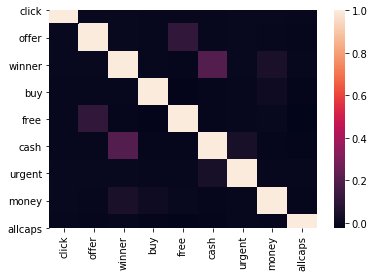

In [28]:
sns.heatmap(sms_raw.corr())

In [34]:
data = sms_raw[keywords + ["allcaps"]]
data.head(5)

,click,offer,winner,buy,free,cash,urgent,money,allcaps
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False


In [47]:
target = sms_raw["spam"]

In [48]:
target.head(5)

0     ham
1     ham
2    spam
3     ham
4     ham
Name: spam, dtype: object

In [96]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

X_train, X_test, y2_train, y2_test = train_test_split(data,target)

bnb.fit(X_train, y2_train)
bnb.predict(X_test)

array(['ham', 'spam', 'ham', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [106]:
bnb.score(X_test, y2_test)

0.8908829863603733

In [107]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

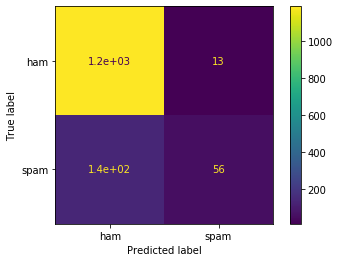

In [108]:
disp = plot_confusion_matrix(bnb, X_test, y2_test, values_format = None)

In [ ]:
# try grams

In [1]:
tfidf=TfidfVectorizer(ngram_range=(1,3))

NameError: name 'TfidfVectorizer' is not defined